In [1]:
import matplotlib.pyplot as plt
import scipy.optimize as fit
import numpy as np

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Text(0.5, 1.0, 'galaxy distance versus red shift ')

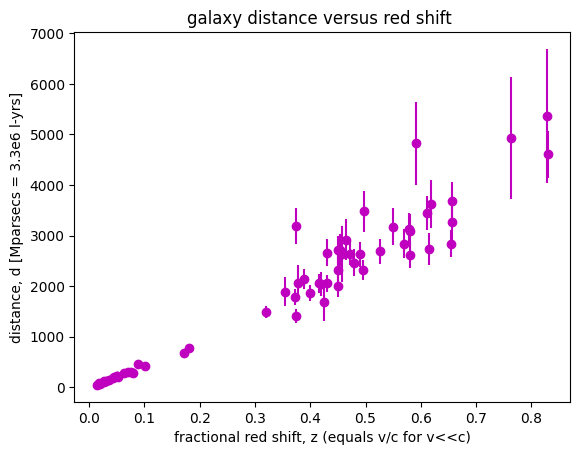

In [3]:
#hubbledata = np.loadtxt("/content/drive/MyDrive/Courses/phy508/hubble-low-z.txt")
hubbledata = np.loadtxt("/content/drive/MyDrive/Courses/phy508/hubble.txt")

x = hubbledata[:,0]
y = hubbledata[:,1]
s = hubbledata[:,2]
N = x.size

plt.errorbar(x, y, yerr=s,fmt='mo')
plt.xlabel("fractional red shift, z (equals v/c for v<<c)" )
plt.ylabel("distance, d [Mparsecs = 3.3e6 l-yrs]")
plt.title('galaxy distance versus red shift ')

slope =  4879.436373124439  +/-  78.53484618753708
offset =  -24.796769747378434  +/-  3.5709352505503
chisq/ndf 1.9816615223129452


Text(0.5, 1.0, 'galaxy distance versus red shift ')

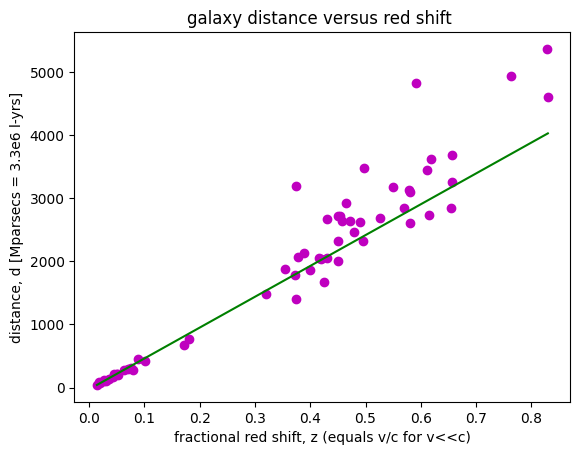

In [4]:
def f1(x, p1, p2):
    return p1*x+p2
pars, covs = fit.curve_fit(f1, x, y, sigma=s, absolute_sigma=True)

yf =  pars[0]*x + pars[1]
residuals = (yf-y)/s
chisq = np.sum(residuals**2)
var = chisq / (N-2)

print("slope = ",pars[0]," +/- ",np.sqrt(covs[0,0]))
print("offset = ",pars[1]," +/- ",np.sqrt(covs[1,1]))
print("chisq/ndf",var)

plt.plot(x,y,'mo')
plt.plot(x,yf,"g-")
plt.xlabel("fractional red shift, z (equals v/c for v<<c)" )
plt.ylabel("distance, d [Mparsecs = 3.3e6 l-yrs]")
plt.title('galaxy distance versus red shift ')



Text(0, 0.5, 'residuals (yf-yi)/si')

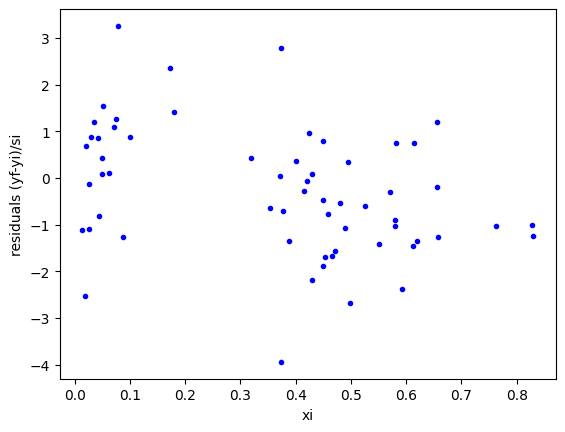

In [5]:
plt.plot(x,residuals, "b.")
plt.xlabel("xi")
plt.ylabel("residuals (yf-yi)/si")

curvature =  1861.3105410940695  +/-  373.099069823635
slope =  4132.748102971576  +/-  169.02619082255592
offset =  -6.6339616455759725  +/-  5.099655550085806
chisq/ndf 1.5525587619071382


Text(0.5, 1.0, 'galaxy distance versus red shift ')

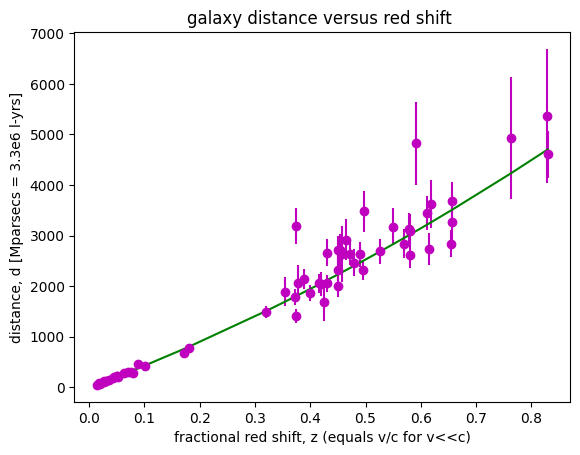

In [6]:
def f2(x, p1, p2, p3):
    return p1*x*x+p2*x+p3
pars, covs = fit.curve_fit(f2, x, y, sigma=s, absolute_sigma=True)

yf =  pars[0]*x*x + pars[1]*x +pars[2]
residuals = (yf-y)/s
chisq = np.sum(residuals**2)
var = chisq / (N-2)

print("curvature = ",pars[0]," +/- ",np.sqrt(covs[0,0]))
print("slope = ",pars[1]," +/- ",np.sqrt(covs[1,1]))
print("offset = ",pars[2]," +/- ",np.sqrt(covs[2,2]))
print("chisq/ndf",var)

plt.errorbar(x,y,s, fmt='mo')
plt.plot(x,yf,"g-")
plt.xlabel("fractional red shift, z (equals v/c for v<<c)" )
plt.ylabel("distance, d [Mparsecs = 3.3e6 l-yrs]")
plt.title('galaxy distance versus red shift ')

[[ 1.39202916e+05 -5.58430108e+04  1.35835252e+03]
 [-5.58430108e+04  2.85698532e+04 -7.26733563e+02]
 [ 1.35835252e+03 -7.26733563e+02  2.60064867e+01]]


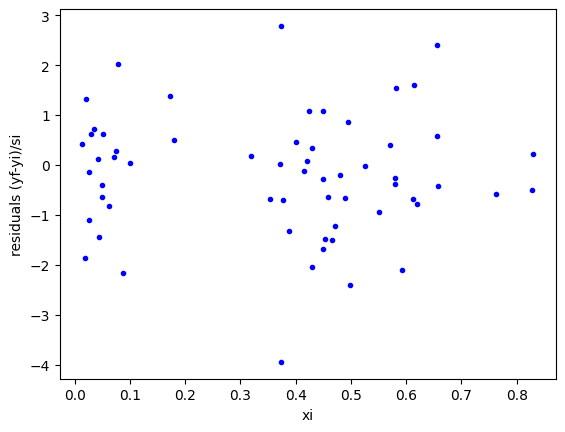

In [7]:
plt.plot(x,residuals, "b.")
plt.xlabel("xi")
plt.ylabel("residuals (yf-yi)/si")
print(covs)